# Guided Activity Three
## Orbital Motion

Round three with Python! 

We will be building a model of orbital motion. This is the first time we will be applying the euler method in more than a single dimension. Let's again try to enfore code re-use: we may need to generalize our alorithms to accept tuples?

As usual, we start with imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Because we are working in multiple dimensions, we can no longer use the manitude of the x-coordinate to determine distance. We want the euclidean distance between points, and a convenient way to get this is the linear algebra concept of a `norm`.

In [12]:
def dist(x):
    ''' Return the distance of point x from the origin <0, 0, .., 0>.
    
        Uses the linear algebra concept of a norm to calculate 
        Euclidean distance.
        
        Examples:
            Given two vectors A = <0,3,8> and B = <0,3,9>
                >>> A = np.asarray([0,3,8])
                >>> B = np.asarray([0,3,9])
        
            Find the length of A.
                >>> dist(A)

            Find the distance between A and B.
                >>> dist(A - B)
                
            Given a list of vectors C = [<1,1,1>, <2,3,5>, <8,3,7>].
                >>> C = np.asarray([[1,1,1], [2,3,5], [8,3,7]])
                
            Find the distances from the origin, O.
                >>> dist(C)
                
            Find the distances from point B.
                >>> dist(C - B)
            
        Args:
            x (np.array):   point or list of points.
            
        Returns:
            np.array: scalar distance or list of scalar distances.
    '''
    
    return np.linalg.norm(x, axis=(x.ndim - 1))

Then we can built a generic gravitational acceleration function. This is slightly different than GA1 and GA2 because it both accepts and returns multi-dimensional inputs and outputs. Heck, we could play with orbital motion in 4-spacial dimensions with this function!

In [3]:
def gravitational_acceleration(x, v, m, M=5.972e24, G=6.67408e-11):
    ''' Return x and y components of acceleration due to gravitity.
    
        Uses:
                    G * m * M / r**2
                    
        Args:
            G (float):   gravitational constant (m**3/(kg * s**2)))
            M (float):   mass of larger object (kg; default is Earth)
            m (float):   mass of smaller object (kg)
            x (float):   x distance from larger object (m)
            y (float):   y distance from larger object (m)
        
        Return:
            [float, float]: direction vector
    '''
    
    r = dist(x)
    a = -(x * G * M) / (np.power(r, 3))
    
    return a

This activity compares the Euler and Euler-Cromer methods, so we will probably need a way to calculate energy.

$$
    E = U_g + U_k
$$

Where:
    
$$
    U_k = \frac{1}{2} m v^2
$$

and,

$$ 
    U_g = -\frac{G m M}{r}
$$

In [22]:
def orbital_energy(x, v, m, y=[0,0], M=5.972e24, G=6.67408e-11):
    ''' Return energy of orbital body in joules. 
    
        Uses:
        
                E = Ug + Uk
            
                where,
                
                    Ug = -GmM / r
                    
                    Uk = 0.5 mv^2
                    
        Args:
            x (float):   x distance from larger object (m)
            v (float):   velcoity of orbiting body (m/s)
            G (float):   gravitational constant (m**3/(kg * s**2)))
            M (float):   mass of larger object (kg; default is Earth)
            m (float):   mass of smaller object (kg)
            y (float):   location of larger object (m; default is (0,0))
        
        Return:
            (float): energy of orbit in joules.
    '''
    
    r = dist(x - y)
    v_avg = dist(v)
    
    return (0.5* m * v_avg * v_avg) - (G * m * M / r)

Now let's reuse the Euler method from our last excercise, being careful to make sure it will accept array inputs. Let's try and really tear up this function. I want to write it in super fast (yet horribly unreadable, ugly) numpy arrays.

In [5]:
def euler_method(acceleration, t0, tf, dt, x0=0, v0=0, modified=False, **kwargs):
    ''' Returns t, x, v, and a arrays for Euler Method

        Args:
            acceleration (func):  a function that accepts x, v, and **kwargs and 
                                      return acceleration.
            t0 (float):           initial time (s)
            tf (float):           final time (s)
            dt (float):           time step (s)
            x0 (np.array):        initial displacement, downwards positive (m)
            v0 (np.array):        intiial velocity, downwards positive (m/s)
            **kwargs:             any additional arguments required for the 
                                      accleration function

            modified (bool):	turns on modified euler method.

        Returns:
            np.float64 (np.array): lisf times (s)
            np.float64 (np.array): list of positions, downwards positive (m)
            np.float64 (np.array): list of velocities, downwards positive (m/s)
            np.float64 (np.array): list of acceleration, downwards positive (m/s**2)
    '''

    t = np.arange(start=t0, stop=tf, step=dt, dtype=np.float64)
    
    points = t.size
    dimensions, = x0.shape
    
    x = np.empty([points, dimensions])
    v = np.empty([points, dimensions])
    a = np.empty([points, dimensions])
    
    x[0] = x0
    v[0] = v0
    a[0] = acceleration(x0, v0, **kwargs)

    for i in range(1, points):
        a[i] = acceleration(x[i-1], v[i-1], **kwargs)
        
        if modified:
            v[i] = v[i-1] + dt * a[i]
            x[i] = x[i-1] + dt * v[i]
        else:        
            x[i] = x[i-1] + dt * v[i-1]
            v[i] = v[i-1] + dt * a[i]
        
    return t, x, v, a

Now we can write a function to find the closestest point of the orbit, and the farthest point of the orbit. Notice the unique application of the `norm` from linear algebra. Cool, huh?

In [6]:
def periapsis(xs, y=None):
    ''' Returns nearest point of object (xs) to center (y).
    
        Args:
            xs (np.array):    list of positions (n-dimensions)
             y (np.array):    single position (n-dimensions)
             
        Returns:
            np.array:  n-dimensional np.float64
    '''
    
    return dist(xs - y).min()

In [7]:
def apoapsis(xs, y=None):
    ''' Returns furthest point of object (xs) from center (y).
    
        Args:
            xs (np.array):    list of positions (n-dimensions)
             y (np.array):    single position (n-dimensions)
             
        Returns:
            np.array:  n-dimensional np.float64
    '''
        
    return dist(xs - y).max()

The oribital period calculation is a little more complex. I we plot the x-position (or y-) against time, its apparent that the orbit represents a sinusoid. We can use our period finding code from the last guided activity to find the orbital period, so long as we complete at least a few cycles. 

In [8]:
def orbital_period(t, x):
    ''' Return period of signal, specifically an orbital period. 
    
        Performs a FFT and returns the frequency of the strongest frequency
        in the sample.
        
        NOTE: Due to the nature of an FFT, more orbits lead to more resolution.
        
        Args:
            t (list):  times (s)
            x (list):  response (unitless)
            
        Returns:
            float:  strongest frequency (Hz)
    
    '''
    from scipy import fftpack

    # Find the sample rate
    dt = t[1] - t[0]
    
    # Perform FFT
    amplitudes  = fftpack.fft(x)
    frequencies = fftpack.fftfreq(len(x)) / dt

    # Return the period with maximum amplitude.
    return 1 / np.abs(frequencies[amplitudes.argmax()])

Now that we have all our convinience functions in place, we can try plotting an orbit.

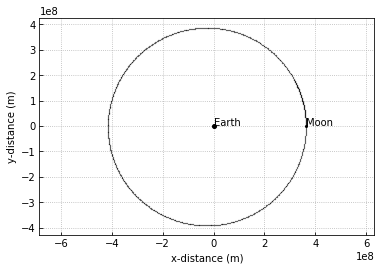

In [33]:
# Initial conditions (see https://nssdc.gsfc.nasa.gov/planetary/factsheet/moonfact.html)
x0 = np.asarray([0.3633e9, 0], dtype=np.float64) # m 
v0 = np.asarray([0,  1.082e3], dtype=np.float64) # m/s
m = 7.34767309e22 # kg

# Simulation parameters.
dt   = 1 # Hours
time = 30 # Days

# Run simulation.
t, x, v, a = euler_method(gravitational_acceleration,
                            x0=x0,
                            v0=v0,
                            t0=np.asarray(0.0, dtype=np.float64),
                            tf=np.asarray(3600*24*time, dtype=np.float64),
                            dt=np.asarray(3600*dt, dtype=np.float64),
                            modified=True,
                            m=m)

# Plot orbit and label bodies.
plt.plot(x[:,0], x[:,1], color='black', marker='o', markersize=0.25, linestyle='')
plt.plot(0, 0, marker='o', color='black', markersize=4)
plt.plot(x0[0], x0[1], marker='o', color='black', markersize=2)
plt.annotate('Earth', (0,0))
plt.annotate('Moon', x0)

# Adjust plot parameters and labels.
plt.tick_params(which='both', direction='in')
plt.grid(which='both', linestyle=':')
plt.axis('equal')
plt.xlabel('x-distance (m)')
plt.ylabel('y-distance (m)')
plt.show()

### Excercise 1

Recall that in class when we built the gravitational model fo the moon orbiting the Earth with a spreadsheet, we employed the modified Euler method (also known as the Euler-Cromer method) to complete the model. To gain an appreciation of why it is important to use this modified algorithm, first build a compuational (MATLAB or C) model of the moon's orbit arund Earth using the simple, non-modified Euler method. What happens to the moon's trajectory in your model (Hint: somethind disatrous!)? Provide plost of the moon's trajectory to demonstrate this disastrous behavior. Can you get reid fo the artifical behavior by making $\Delta t$ smaller? Next, build the model (MATLAB or C) using the EUler-Cromer method. Demonstrate your model porduces the correct period of orbit. Finally, try to make an intelligen comment about why the Euler-Cromer algorithm owrks, and the non-modified Euler algorithm does not. Is there soemthing you can calculated and plot that may provide insite into why the Euler algorithm fails?

#### Solution 1

##### ( Step 1 ) Plot the Moon's Trajectory using Euler and Euler-Cromer

AttributeError: Unknown property loc

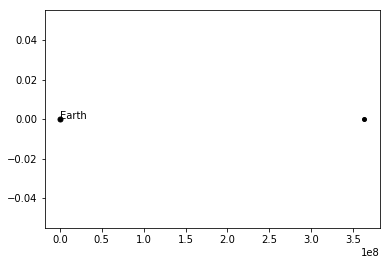

In [47]:
# adsabs.harard.edu/abs
# 1P/Halley Distance @ Perihelion: 8.766e10 m
# 1P/Halley Velocity @ Perihelion: 55000 m/s

# Initial conditions (see https://nssdc.gsfc.nasa.gov/planetary/factsheet/moonfact.html)
x0 = np.asarray([0.3633e9, 0], dtype=np.float64) # m 
v0 = np.asarray([0,  1.082e3], dtype=np.float64) # m/s
m = 7.34767309e22 # kg

# Simulation parameters.
dt   = 1 # Hours
time = 100# Days

# Run simulation.
t_smp, x_smp, v_smp, a_smp = euler_method(gravitational_acceleration,
                                          x0=x0,
                                          v0=v0,
                                          t0=np.asarray(0.0, dtype=np.float64),
                                          tf=np.asarray(3600*24*time, dtype=np.float64),
                                          dt=np.asarray(3600*dt, dtype=np.float64),
                                          modified=False,
                                          m=m)

t_cro, x_cro, v_cro, a_cro = euler_method(gravitational_acceleration,
                                          x0=x0,
                                          v0=v0,
                                          t0=np.asarray(0.0, dtype=np.float64),
                                          tf=np.asarray(3600*24*time, dtype=np.float64),
                                          dt=np.asarray(3600*dt, dtype=np.float64),
                                          modified=True,
                                          m=m)

# Plot orbit and label bodies.
plt.plot(0, 0, marker='o', color='black', markersize=5)
plt.plot(x0[0], x0[1], marker='o', color='black', markersize=4)
plt.annotate('Earth', (0,0))
plt.annotate('Moon', x0, loc='left')

# Plot both Simple Euler and Euler-Cromer solutionns.
plt.plot(x_smp[:,0], x_smp[:,1], color='black', linestyle='--', label='Simple Euler')
plt.plot(x_cro[:,0], x_cro[:,1], color='black', linestyle='-', label='Euler-Cromer')

# Adjust plot parameters and labels.
plt.tick_params(which='both', direction='in')
plt.grid(which='both', linestyle=':')
plt.axis('equal')
plt.xlabel('x-distance (m)')
plt.ylabel('y-distance (m)')
plt.title('Trajectory of the Orbit of the Moon')
plt.legend(loc='upper left')
plt.show()

### Exercise 2

Alter your (MATLAB or C) program to model the orbital trajectory of Halley's Commet around the Sun. Produce plots of the orbital trajectory and demonstrate that your model correctly simulated the period, the aphelion, and perihelion of the comet's orbit. Don't forget to address the accuracy issue (what is a sufficiently small $\Delta t$?